<a href="https://colab.research.google.com/github/dlyrikz/DeepLearning/blob/master/RNN_LSTM_for_IMDB_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install and Setup

In [55]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Data Preprocessing

In [56]:
# importing libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [57]:
# loading thr datasets
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=20000)

In [58]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [59]:
# apply padding
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [60]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

# Step 3: Build the Model

In [61]:
# define an object (RNN)
model = tf.keras.models.Sequential()

In [62]:
# Embedding layer
model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_shape=(100,)))

In [63]:
# LSTM Layer
model.add(tf.keras.layers.LSTM(units=128,activation='tanh'))

In [64]:
# output layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model

In [67]:
history = model.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
196/196 [==============================] - 9s 44ms/step - loss: 0.4586 - accuracy: 0.7873 - val_loss: 0.3516 - val_accuracy: 0.8493
Epoch 2/5
196/196 [==============================] - 8s 40ms/step - loss: 0.2894 - accuracy: 0.8838 - val_loss: 0.4786 - val_accuracy: 0.8270
Epoch 3/5
196/196 [==============================] - 8s 40ms/step - loss: 0.2329 - accuracy: 0.9099 - val_loss: 0.3665 - val_accuracy: 0.8440
Epoch 4/5
196/196 [==============================] - 8s 41ms/step - loss: 0.1890 - accuracy: 0.9283 - val_loss: 0.3814 - val_accuracy: 0.8461
Epoch 5/5
196/196 [==============================] - 8s 41ms/step - loss: 0.1523 - accuracy: 0.9456 - val_loss: 0.5451 - val_accuracy: 0.8213


In [68]:
# Predictions
y_predict = model.predict_classes(x_test)

In [69]:
print(y_predict[10], y_test[10])

[1] 1


In [70]:
print(y_predict[15], y_test[15])

[0] 0


In [71]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[11469  1031]
 [ 3437  9063]]


In [72]:
accuracy_cm = accuracy_score(y_test, y_predict)
print(accuracy_cm)

0.82128


# Step 5: Learning Curve

In [75]:
def learning_curve(history, epoch):

  #training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'], label='Train')
  plt.plot(epoch_range, history.history['val_accuracy'], label='Val Accuracy')
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(loc='upper left')
  plt.show()

  #training vs validation loss

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'], label="Train")
  plt.plot(epoch_range, history.history['val_loss'], label="Loss")
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='upper left')
  plt.show()

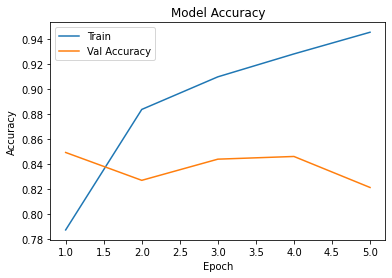

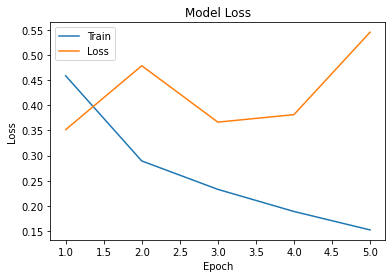

In [76]:
learning_curve(history, 5)